# Fizz Buzz

Fizz Buzz is a classic programming problem often used in coding interviews. The problem goes as follows:

For numbers from 1 to 100, print:

* "Fizz" if the number is divisible by 3.
* "Buzz" if the number is divisible by 5.
* "FizzBuzz" if the number is divisible by both 3 and 5.
* The number itself if it doesn't meet any of the above conditions.
  
The sequence would look like this:
```
1, 2, "Fizz", 4, "Buzz", "Fizz", 7, 8, "Fizz", "Buzz", 11, "Fizz", 13, 14, "FizzBuzz", 16, ...
```

Thanks Joel Grus for the idea :)

In [1]:
import tensorflow as tf

# Check if GPU is available
print(tf.test.gpu_device_name())

/device:GPU:0


In [2]:
import numpy as np
import tensorflow as tf

np.random.seed(13)
tf.random.set_seed(13)

NUM_DIGITS = 10


def binary_encode(i, num_digits):
    """
    Binary encode a number i with num_digits digits.
    For example, binary_encode(3, 10) = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    """
    return np.array([i >> d & 1 for d in range(num_digits)])


def fizz_buzz_encode(i):
    """
    One-hot encode the desired outputs: [number, "fizz", "buzz", "fizzbuzz"]
    """
    if i % 15 == 0:
        return np.array([0, 0, 0, 1])
    elif i % 5 == 0:
        return np.array([0, 0, 1, 0])
    elif i % 3 == 0:
        return np.array([0, 1, 0, 0])
    else:
        return np.array([1, 0, 0, 0])


def fizz_buzz(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]


def binary_to_int(bin_array):
    return sum([x * 2**i for i, x in enumerate(bin_array)])

We will be using 1 to 100 as our test data, so we can use 101 to 1024 as our training data.

In [3]:
X_train = np.array([binary_encode(i, NUM_DIGITS) for i in range(101, 2 ** NUM_DIGITS)])
y_train = np.array([fizz_buzz_encode(i) for i in range(101, 2 ** NUM_DIGITS)])

X_test = np.array([binary_encode(i, NUM_DIGITS) for i in range(1, 101)])
y_test = np.array([fizz_buzz_encode(i) for i in range(1, 101)])

In [4]:
class DisplayOnceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {logs['loss']}, Accuracy: {logs['accuracy']}")


model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100, input_shape=(NUM_DIGITS,), activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(4, activation="softmax"),
    ]
)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    callbacks=[DisplayOnceCallback()],
    verbose=0,
)

Epoch 0, Loss: 1.3178226947784424, Accuracy: 0.37269771099090576
Epoch 100, Loss: 0.3001893162727356, Accuracy: 0.947995662689209
Epoch 200, Loss: 0.031151194125413895, Accuracy: 0.9989165663719177
Epoch 300, Loss: 0.008606985211372375, Accuracy: 1.0
Epoch 400, Loss: 0.003533342620357871, Accuracy: 1.0
Epoch 500, Loss: 0.0017025722190737724, Accuracy: 1.0
Epoch 600, Loss: 0.0009158594184555113, Accuracy: 1.0
Epoch 700, Loss: 0.000502018432598561, Accuracy: 1.0
Epoch 800, Loss: 0.000296346697723493, Accuracy: 1.0
Epoch 900, Loss: 0.0001719119172776118, Accuracy: 1.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(
    actual_labels, predicted_labels, labels, title="Confusion Matrix"
):
    cm = confusion_matrix(actual_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

4/4 [==============================] - 0s 4ms/step


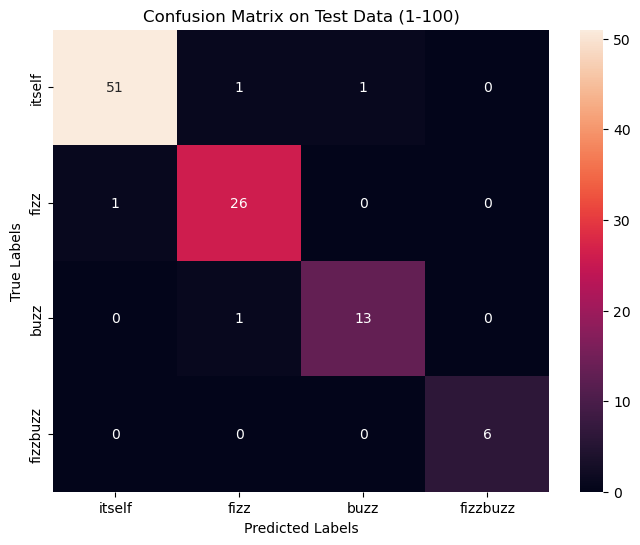

0.96


In [6]:
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

actual_classes = y_test.argmax(axis=1)

plot_confusion_matrix(
    actual_classes,
    predicted_classes,
    ["itself", "fizz", "buzz", "fizzbuzz"],
    title="Confusion Matrix on Test Data (1-100)",
)
# accuracy
print(np.mean(actual_classes == predicted_classes))